In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
data1 = pd.read_csv("heart.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
data2 = pd.read_csv("heart_cleveland_upload.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
data1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [8]:
#the hardcoding, specifically selecting hypertensive patients data

hypertension_patients = []
for i,row in data1.iterrows():
    if data1.loc[i, "Age"] <= 65:
        if data1.loc[i, "RestingBP"] > 120:
            hypertension_patients.append(row)
    else:
        if data1.loc[i, "RestingBP"] >= 135:
            hypertension_patients.append(row)

htd_patients = pd.DataFrame(hypertension_patients, columns=['Age', 'Sex', 
     'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
     'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',  'HeartDisease'])

hypertension_patients = []
for i,row in data2.iterrows():
    if data2.loc[i, "age"] <= 65:
        if data2.loc[i, "trestbps"] > 120:
            hypertension_patients.append(row)
    else:
        if data2.loc[i, "trestbps"] >= 135:
            hypertension_patients.append(row)

htd_patients_clevland = pd.DataFrame(hypertension_patients, columns=['age', 'sex', 
        'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'])

# htd_patients is now the new data frame exclusively containing hypertension patients
# htd_patients_clevland is the new df for the clevland dataset

In [9]:
htd_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             617 non-null    int64  
 1   Sex             617 non-null    object 
 2   ChestPainType   617 non-null    object 
 3   RestingBP       617 non-null    int64  
 4   Cholesterol     617 non-null    int64  
 5   FastingBS       617 non-null    int64  
 6   RestingECG      617 non-null    object 
 7   MaxHR           617 non-null    int64  
 8   ExerciseAngina  617 non-null    object 
 9   Oldpeak         617 non-null    float64
 10  ST_Slope        617 non-null    object 
 11  HeartDisease    617 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 62.7+ KB


In [10]:
htd_patients_clevland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        197 non-null    float64
 1   sex        197 non-null    float64
 2   cp         197 non-null    float64
 3   trestbps   197 non-null    float64
 4   chol       197 non-null    float64
 5   fbs        197 non-null    float64
 6   restecg    197 non-null    float64
 7   thalach    197 non-null    float64
 8   exang      197 non-null    float64
 9   oldpeak    197 non-null    float64
 10  slope      197 non-null    float64
 11  ca         197 non-null    float64
 12  thal       197 non-null    float64
 13  condition  197 non-null    float64
dtypes: float64(14)
memory usage: 23.1 KB


In [11]:
htd_patients = pd.get_dummies(htd_patients, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [12]:
htd_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                617 non-null    int64  
 1   RestingBP          617 non-null    int64  
 2   Cholesterol        617 non-null    int64  
 3   FastingBS          617 non-null    int64  
 4   MaxHR              617 non-null    int64  
 5   Oldpeak            617 non-null    float64
 6   HeartDisease       617 non-null    int64  
 7   Sex_F              617 non-null    uint8  
 8   Sex_M              617 non-null    uint8  
 9   ChestPainType_ASY  617 non-null    uint8  
 10  ChestPainType_ATA  617 non-null    uint8  
 11  ChestPainType_NAP  617 non-null    uint8  
 12  ChestPainType_TA   617 non-null    uint8  
 13  RestingECG_LVH     617 non-null    uint8  
 14  RestingECG_Normal  617 non-null    uint8  
 15  RestingECG_ST      617 non-null    uint8  
 16  ExerciseAngina_N   617 non

In [13]:
htd_patients.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

<Axes: >

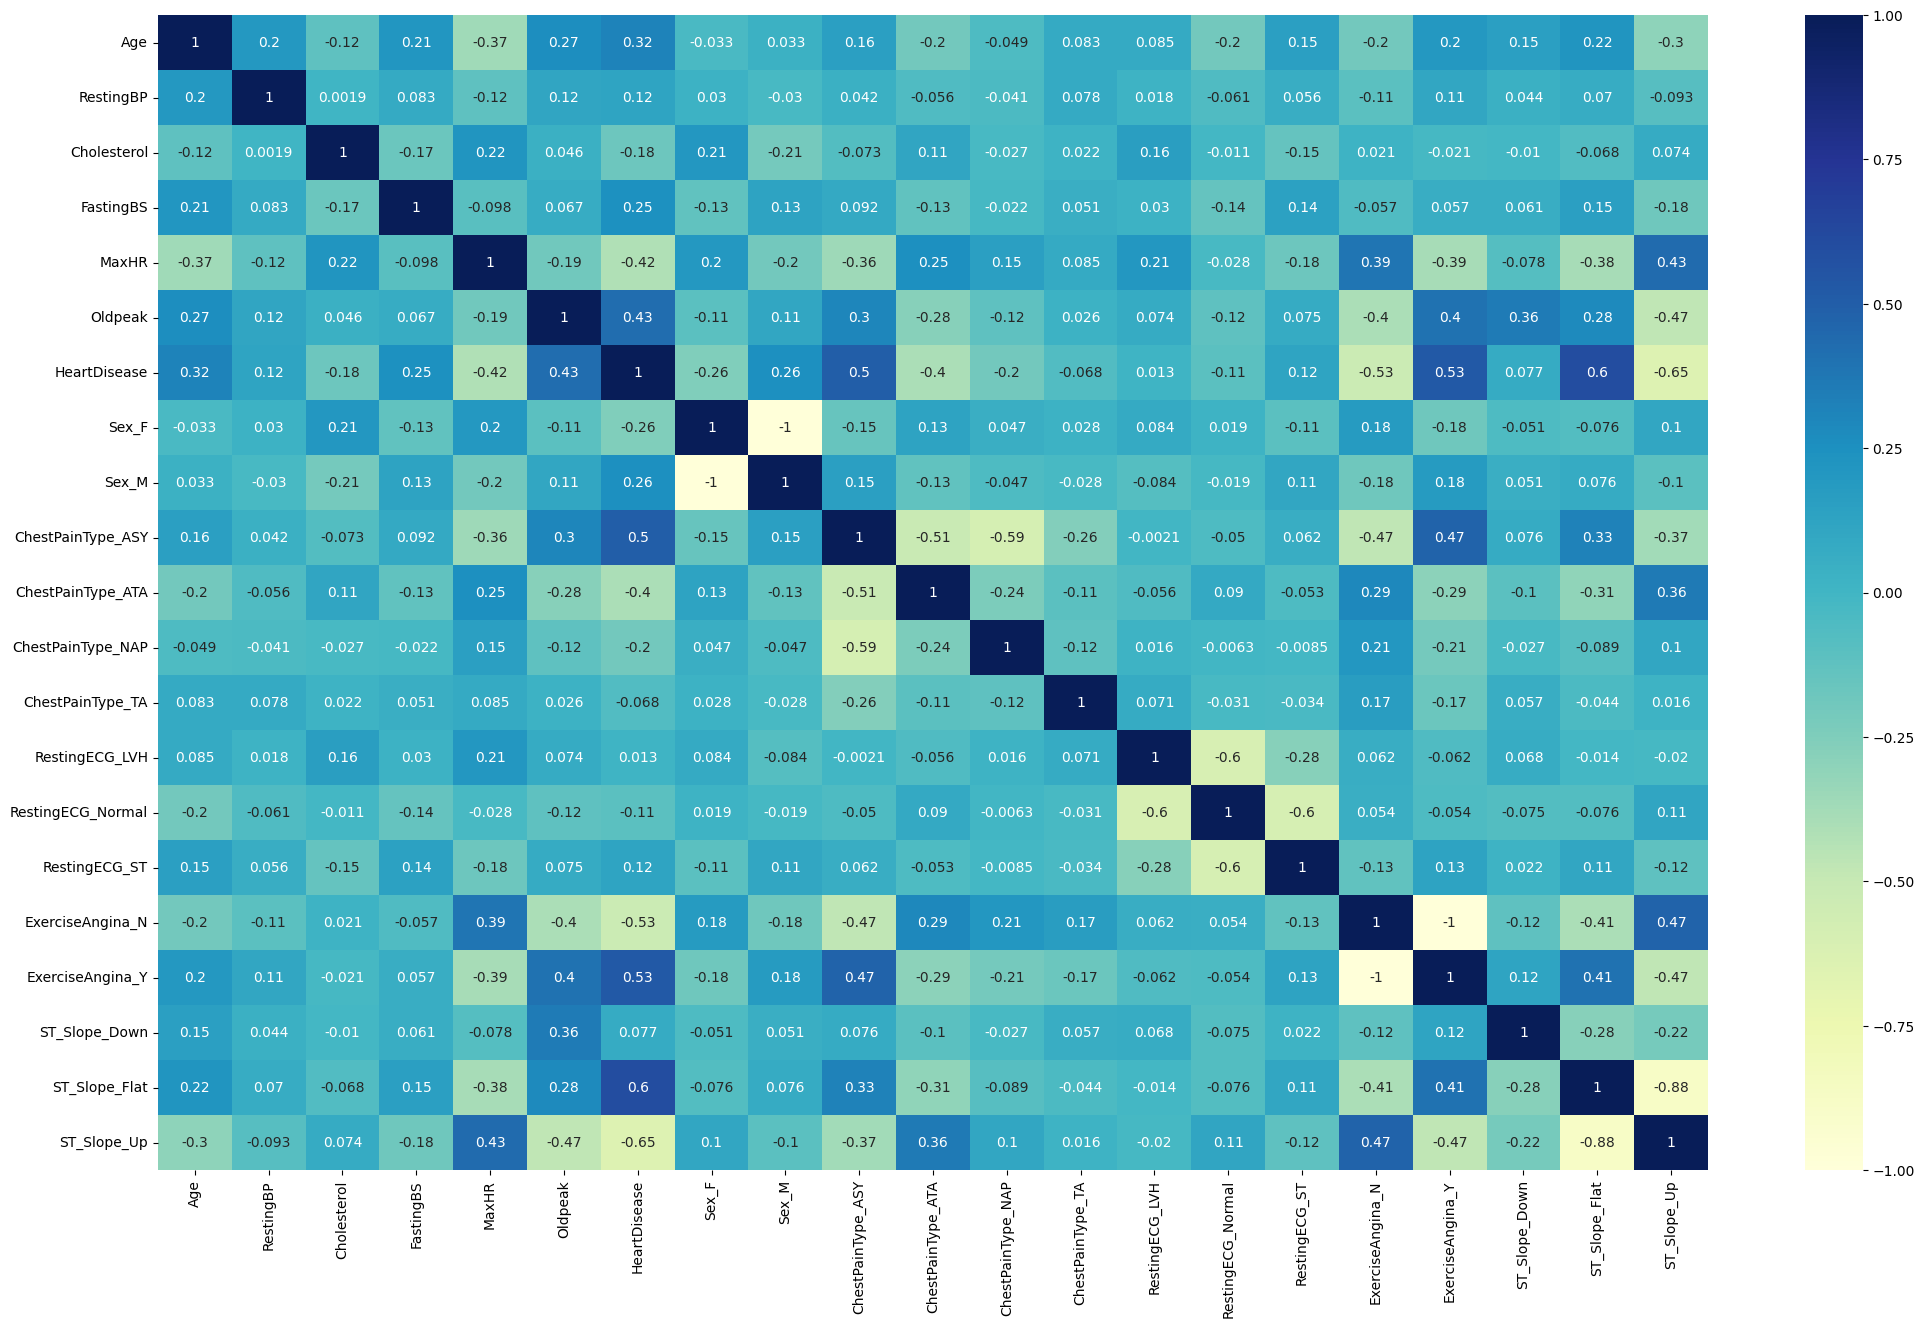

In [14]:
plt.figure(figsize = (25,15))
sns.heatmap(htd_patients[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']].corr(), 
       cmap="YlGnBu", annot=True)

In [15]:
htd_patients_clevland.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

<Axes: >

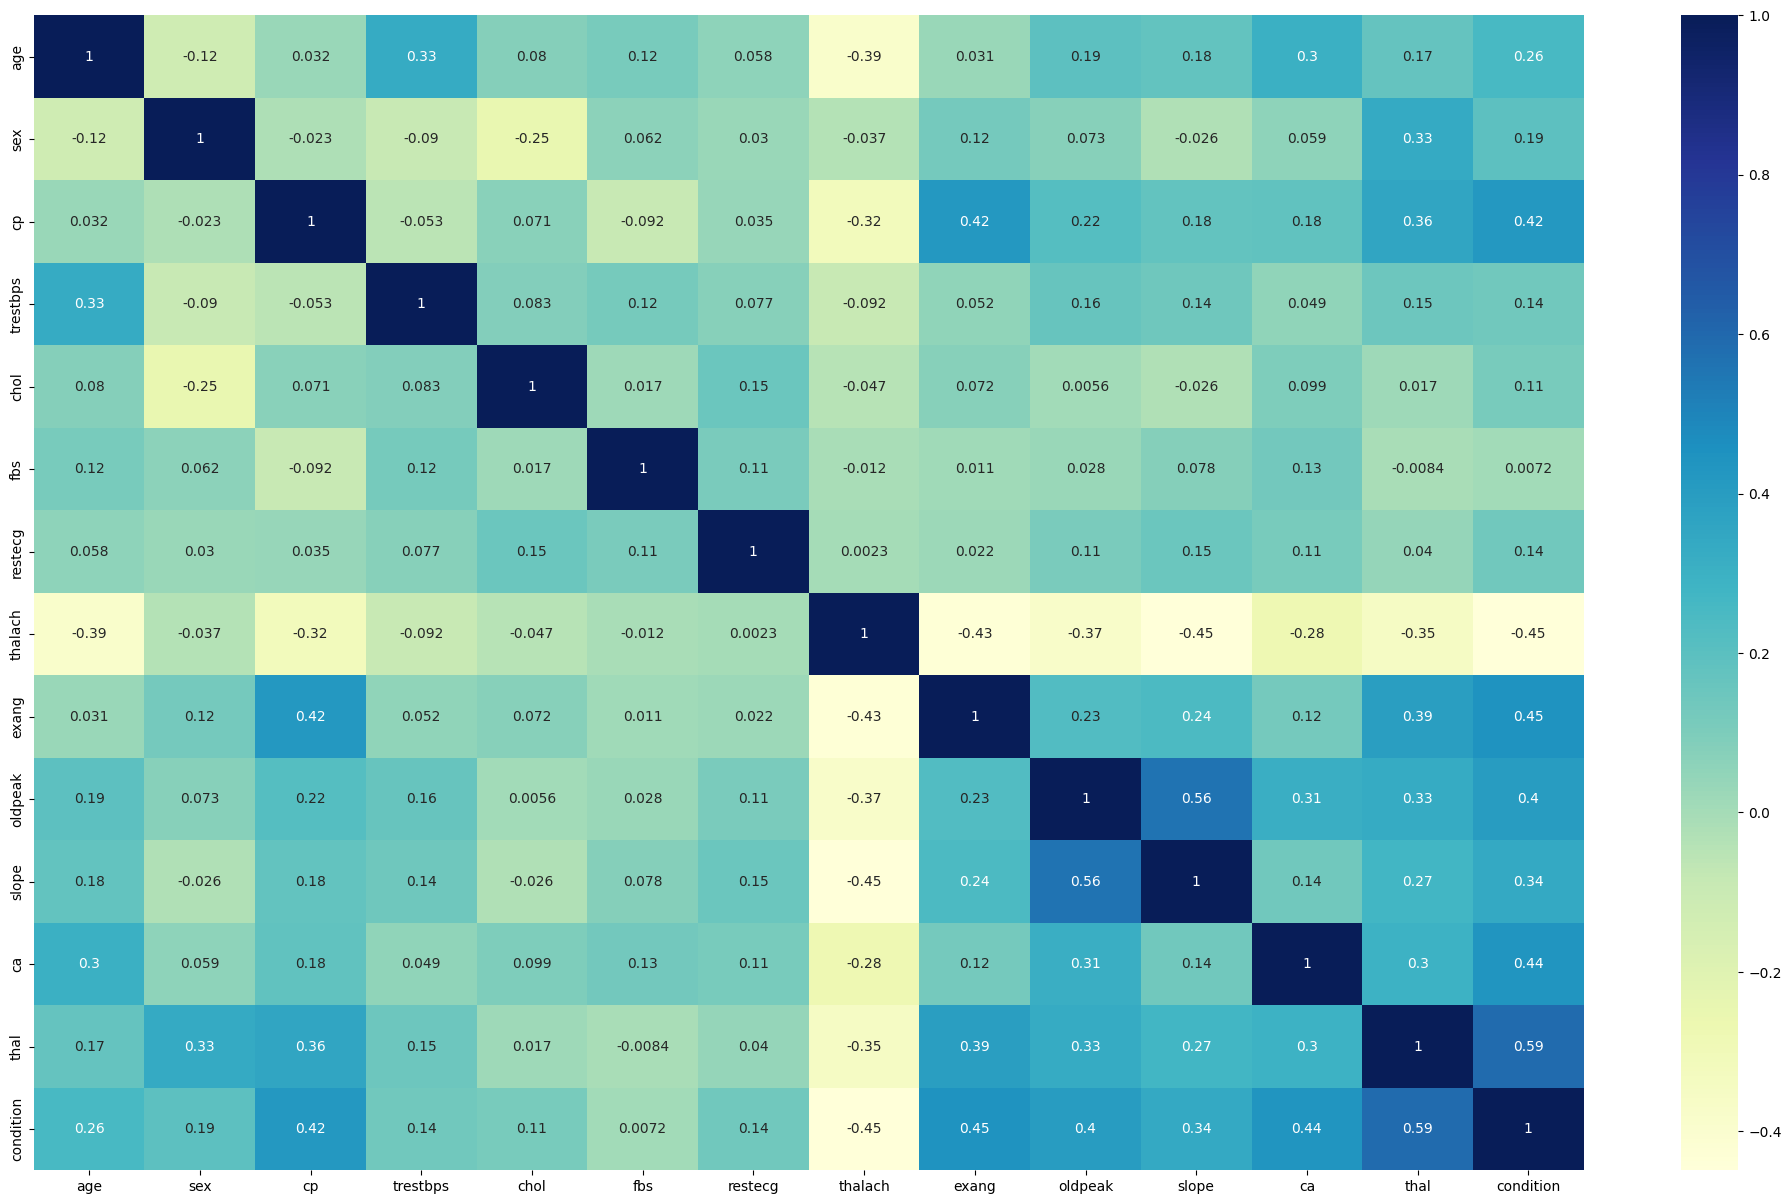

In [16]:
plt.figure(figsize = (25,15))
sns.heatmap(htd_patients_clevland[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']].corr(), 
       cmap="YlGnBu", annot=True)

In [19]:
htd_patients.columns

21

In [18]:
X1 = htd_patients [['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']]
Y1 = htd_patients [['HeartDisease']]

In [54]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [55]:
model.compile(loss="BinaryCrossentropy",
optimizer="adam",
metrics=["accuracy"])

In [56]:
history = model.fit(X1, Y1, epochs=500)

Epoch 1/500
20/20 [==============================] - 3s 5ms/step - loss: 0.7565 - accuracy: 0.5397
Epoch 2/500
20/20 [==============================] - 0s 10ms/step - loss: 0.6805 - accuracy: 0.5835
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6326 - accuracy: 0.6337
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6256 - accuracy: 0.6532
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5951 - accuracy: 0.6953
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7374
Epoch 7/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5460 - accuracy: 0.7326
Epoch 8/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5233 - accuracy: 0.7553
Epoch 9/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5739 - accuracy: 0.7099
Epoch 10/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5401 - accuracy: 0.7374
Epoch 11